# Parte 1. Análisis de sentimiento

## Apartado a)

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

#---------------------------
# NAive Bayes 
#---------------------------
from sklearn.naive_bayes import BernoulliNB
# Util para clasificar documentos cortos
from sklearn.naive_bayes import MultinomialNB


from sklearn.tree import DecisionTreeClassifier


In [562]:
file = open("./Datos/yelp_labelled.txt")
dic = {'data':[], 'target':[]}
target_names = ["Negativos", "Pisitivos"]

corpus = file.readlines() 

for i in range (len(corpus)): 
    dic.get('data').append(corpus[i].split("\t")[0]) #agrega solo las frase
    #[0] ya que divide en una lista de dos elementos y queremos coger donde esta la frase 
    #[1] esta el numero 
    n = int(corpus[i].split("\t")[1].split("\n")[0])
    dic.get('target').append(n)
    
    #cogemos el numero, al hacer una nueva separacion nos devuelve una lista cons dos elementos 
    #el numero esta en la pos 0 
X_train, x_test, y_train, y_test = train_test_split(
    dic.get('data'), dic.get('target'), test_size = 0.25,  random_state=42)

In [563]:
dic.get('data')[0]

'Wow... Loved this place.'

In [564]:
dic.get('target')[0]

1

In [565]:
dic.get('target_name')

In [566]:
print(dic.get('target_name'))

None


In [567]:
clasificadoresNB = [] 
clasificadoresAD = []

In [568]:
#Orden de datos:  

#reportNB[0] = Nombre de algoritmo y bolsa  
#reportNB[1] = Exactitud 
#reportNB[2] = Recall
#reportNB[3] = Especificidad
#reportNB[4] = Matriz de confusion 
#reportNB[5] = Reporte de medidas'
#reportNB[6] = prediccion test 

In [569]:
df_NB = pd.DataFrame({'Nombre': [], 'Exactitud': [], 'Recall': [], 'Especificidad': []})
df_AD = pd.DataFrame({'Nombre': [], 'Exactitud': [], 'Recall': [], 'Especificidad': []})

### Bolsa de palabras binaria con monograma

In [570]:
#PRIMERO: 
#Obtenemos la frecuencia de palabras, mediante el diccionario estandar
vecBM = CountVectorizer(stop_words = "english", binary = True, ngram_range = (1,1))
train_vec_data = vecBM.fit_transform(X_train) # SOLO para conjunto de entrenamiento 

test_vec_data = vecBM.transform(x_test)

#### Clasificador NaiveBayes

In [571]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vec_data, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data)
y_pred_test = algoritmo.predict(test_vec_data)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresNB.append(
    ("NB binario con monograma:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.948
Accuracy test:  0.78


In [572]:
from sklearn.naive_bayes import MultinomialNB

algoritmo = MultinomialNB()

#Entrenamos al modelo 
algoritmo.fit(train_vec_data, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data)
y_pred_test = algoritmo.predict(test_vec_data)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.9506666666666667
Accuracy test:  0.764


#### Árbol de decisión

In [573]:
algoritmo = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=None)
#Entrenamos al modelo 
algoritmo.fit(train_vec_data, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data)
y_pred_test = algoritmo.predict(test_vec_data)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresAD.append(
    ("AD binario con monograma:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9626666666666667
Accuracy test:  0.688


In [574]:
algoritmo = DecisionTreeClassifier()
#Entrenamos al modelo 
algoritmo.fit(train_vec_data, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data)
y_pred_test = algoritmo.predict(test_vec_data)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9973333333333333
Accuracy test:  0.688


### Bolsa de palabras binaria con bigrama

In [575]:
vecBB = CountVectorizer(stop_words = "english", binary = True, ngram_range = (1,2))
train_vec_data_bb = vecBB.fit_transform(X_train)

test_vec_data_bb = vecBB.transform(x_test)

#### Clasificador NaiveBayes

In [576]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vec_data_bb, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data_bb)
y_pred_test = algoritmo.predict(test_vec_data_bb)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresNB.append(
    ("NB binario con bigrama:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))


print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9773333333333334
Accuracy test:  0.78


In [577]:
algoritmo = MultinomialNB()

#Entrenamos al modelo 
algoritmo.fit(train_vec_data_bb, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data_bb)
y_pred_test = algoritmo.predict(test_vec_data_bb)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.9773333333333334
Accuracy test:  0.772


#### Árbol de decisión 

In [578]:
algoritmo = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=None)
#Entrenamos al modelo 
algoritmo.fit(train_vec_data_bb, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data_bb)
y_pred_test = algoritmo.predict(test_vec_data_bb)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresAD.append(
    ("AD binario con bigrama:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))


print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9733333333333334
Accuracy test:  0.716


In [579]:
algoritmo = DecisionTreeClassifier()
#Entrenamos al modelo 
algoritmo.fit(train_vec_data_bb, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data_bb)
y_pred_test = algoritmo.predict(test_vec_data_bb)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9973333333333333
Accuracy test:  0.7


### Bolsa de palabras TF/IDF con monograma

In [580]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### Clasificador NaiveBayes

In [581]:
vec = CountVectorizer(stop_words = "english", binary = False, ngram_range = (1,1))
train_vec_data = vec.fit_transform(X_train)
tfidfer = TfidfTransformer()
train_vecIDF = tfidfer.fit_transform(train_vec_data) # obtenemos el IDF 



In [582]:
test_vec_data = vec.transform(x_test)

tes_vec_IDF = tfidfer.transform(test_vec_data)

In [583]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF)
y_pred_test = algoritmo.predict(tes_vec_IDF)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresNB.append(
    ("NB TF/IDF con monograma:",accuracy, recall,precision, matriz,report, algoritmo, y_pred_test))


print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.948
Accuracy test:  0.78


In [584]:
algoritmo = MultinomialNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF)
y_pred_test = algoritmo.predict(tes_vec_IDF)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.9613333333333334
Accuracy test:  0.772


#### Árbol de decisión 

In [585]:
algoritmo = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=None)
#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF)
y_pred_test = algoritmo.predict(tes_vec_IDF)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresAD.append(
    ("AD TF/IDF con monograma:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.968
Accuracy test:  0.688


In [586]:
algoritmo = DecisionTreeClassifier()
#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF)
y_pred_test = algoritmo.predict(tes_vec_IDF)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9973333333333333
Accuracy test:  0.688


### Bolsa de palabras TF/IDF con bigrama

#### Clasificador NaiveBayes

In [587]:
vecBi = CountVectorizer(stop_words = "english", binary = False, ngram_range = (1,2))
train_vec_dataBi = vecBi.fit_transform(X_train)
tfidfer = TfidfTransformer()
train_vecIDF_Bi = tfidfer.fit_transform(train_vec_dataBi)



In [588]:
test_vec_data_Bi = vecBi.transform(x_test)
tes_vec_IDF_Bi = tfidfer.transform(test_vec_data_Bi)

In [589]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF_Bi)
y_pred_test = algoritmo.predict(tes_vec_IDF_Bi)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresNB.append(
    ("NB TF/IDF con bigrama:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))


print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9773333333333334
Accuracy test:  0.78


In [590]:
algoritmo = MultinomialNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF_Bi)
y_pred_test = algoritmo.predict(tes_vec_IDF_Bi)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9893333333333333
Accuracy test:  0.784


#### Árbol de decisión 

In [591]:
algoritmo = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=None)
#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF_Bi)
y_pred_test = algoritmo.predict(tes_vec_IDF_Bi)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresAD.append(
    ("AD TF/IDF con bigrama:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9693333333333334
Accuracy test:  0.66


In [592]:
algoritmo = DecisionTreeClassifier()
#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF_Bi)
y_pred_test = algoritmo.predict(tes_vec_IDF_Bi)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9973333333333333
Accuracy test:  0.68


-----
### Análisis de los resultados
---

### ¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?

Ambos clasificadores reducen la exactitud en el test, esto quiere decir que hay un sobre apredizage del algoritmo. De todso modos, el clasificador Naïve Bayes proporciona mejores resultados que el Árbol de Decisión debido a que el primero hace uso de probabilidad mediante el Teorema de Bayes proporcionando mejores resultados mientras que el otro se basa en generar un arbol mediante nodos que son los que oreguntan por los valores de una varaible tomando un camino aparentemente bueno pero que en etapas posteriores puede que no sea el mejor.
También Naïve Bayes eleva los resultados en el porcentaje de acierto en test. 




## RESULTADOS

In [593]:
len(clasificadoresAD)

4

In [594]:
for i in range (len(clasificadoresNB)): 
    #print(clasificadoresNB[i][0], clasificadoresNB[i][1])
    df_NB = df_NB.append({"Nombre":clasificadoresNB[i][0] ,"Exactitud":clasificadoresNB[i][1], "Recall": clasificadoresNB[i][2], "Especificidad": clasificadoresNB[i][3]}, ignore_index=True)

#print("-------------------------------")

for j in range (len(clasificadoresAD)): 
   #print(clasificadoresAD[j][0], clasificadoresAD[j][1])
    df_AD = df_AD.append({"Nombre":clasificadoresAD[j][0] ,"Exactitud":clasificadoresAD[j][1], "Recall": clasificadoresAD[i][2], "Especificidad": clasificadoresAD[i][3]}, ignore_index=True)


#### __Naïve Bayes__

In [595]:
df_NB

,Nombre,Exactitud,Recall,Especificidad
0,NB binario con monograma:,0.78,0.852459,0.737589
1,NB binario con bigrama:,0.78,0.885246,0.724832
2,NB TF/IDF con monograma:,0.78,0.852459,0.737589
3,NB TF/IDF con bigrama:,0.78,0.885246,0.724832


In [596]:
#for i in range (len(reportNB)):
   # print("Reporte medias clasificación,", reportNB[i][2])
   # print(reportNB[i][1])
   # print("Matriz de confusión")
   # print(reportNB[i][0])
   # print("----------------------------------------------------------")

#### __Árbol de decisión__

In [597]:
df_AD

,Nombre,Exactitud,Recall,Especificidad
0,AD binario con monograma:,0.688,0.639344,0.655462
1,AD binario con bigrama:,0.716,0.639344,0.655462
2,AD TF/IDF con monograma:,0.688,0.639344,0.655462
3,AD TF/IDF con bigrama:,0.660,0.639344,0.655462


In [598]:
#for i in range (len(reportAD)):
 #   print("Reporte medias clasificación,", reportAD[i][2])
 #  print(reportAD[i][1])
 #   print("Matriz de confusión")
 #   print(reportAD[i][0])
 #   print("----------------------------------------------------------")

In [599]:
import numpy as np
import matplotlib.pyplot as plt

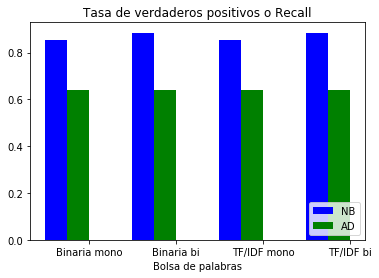

In [600]:
#Recall 
datos = [list(df_NB["Recall"]), list(df_AD["Recall"])]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Tasa de verdaderos positivos o Recall")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

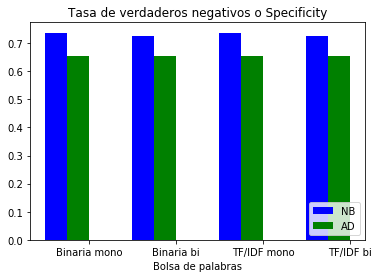

In [601]:
# tasa de verdaderos negativos o specificity
datos = [list(df_NB["Especificidad"]), list(df_AD["Especificidad"])]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Tasa de verdaderos negativos o Specificity")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

-----
### Análisis de los resultados
---

- #### ¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?

Si, el clasificador Naïve Bayes proporciona mejores resultados que el Árbol de Decisión debido a que el primero hace uso de probabilidad mediante el Teorema de Bayes proporcionando mejores resultados mientras que el otro se basa en generar un arbol mediante los nodos que son los que oreguntan por los valores de una varaible tomando un camino aparentemente bueno pero que en etapas posteriores no es el mejor. 


- #### Para cada clasificador, ¿tiene un efecto positivo el añadir “complejidad” a la vectorización? Es decir, añadir bigramas y añadir tf-idf. ¿Por qué crees que sucede este efecto positivo o la falta del mismo?

En lineas geberales presentan valores similares, por lo que no mejoran mucho los resultaods. Puede ser debido a que son corpus pequeños y de jerga local, además el diccionario es inducido por lo que se agregan todos los terminos produciendo ruido. 
Podemos observar esa similitud en el digrama de exactitudes de las 4 bolsas de palabras con los dos clasificadores haciendo una comparación. Se puede ver como las barras son practicamente de una altura similar en las 4 bolsas de palabras. 

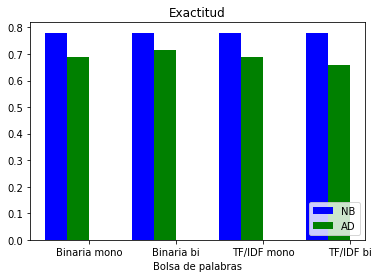

In [602]:
#Exactitud 
exNB= list(df_NB["Exactitud"])
exAD = list(df_AD["Exactitud"])

datos = [exNB, exAD]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Exactitud")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

#### __Selecciona el mejor árbol de decisión y obtén las 25 variables con más poder discriminante__ 

In [603]:
def print_top20_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names()
    
    top20 = np.argsort(clf.feature_importances_)[-20:]
    reversed_top = top20[::-1]
    print("Top 20 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top)))

In [604]:
df_AD

,Nombre,Exactitud,Recall,Especificidad
0,AD binario con monograma:,0.688,0.639344,0.655462
1,AD binario con bigrama:,0.716,0.639344,0.655462
2,AD TF/IDF con monograma:,0.688,0.639344,0.655462
3,AD TF/IDF con bigrama:,0.660,0.639344,0.655462


Podemos ver como los mejores resultados nos los proporcionan los arboles 0 y 1. Elegimos el binario con bigrama

In [610]:
print(clasificadoresAD[1][0])
print(clasificadoresAD[1][6])

AD binario con bigrama:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [611]:
print(clasificadoresAD[1][5])

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       128
           1       0.77      0.59      0.67       122

    accuracy                           0.72       250
   macro avg       0.73      0.71      0.71       250
weighted avg       0.73      0.72      0.71       250



In [612]:
print("Matriz de confusión")
print(clasificadoresAD[1][4])

Matriz de confusión
[[107  21]
 [ 50  72]]


In [613]:
print_top20_features_in_trees(vecBB,clasificadoresAD[1][6])

Top 20 features in the tree

great / good / delicious / nice / amazing / awesome / love / excellent / friendly / fantastic / best / vegas / perfect / loved / place / restaurant / fun / don / restaurants / tender


- #### ¿Predominan más las palabras de uno u otro sentimiento? ¿por qué? ¿hay ruido?



Predominan las palabras positivas

####  __Selecciona el mejor clasificador naive bayes y obtén las 25 variables con más presencia en cada clase:__

In [614]:
def print_top20_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    print("Top 20 features per class\n")
    for i, class_label in enumerate(class_labels):
        top20 = np.argsort(clf.feature_log_prob_[i])[-20:]
        reversed_top = top20[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [615]:
df_NB

,Nombre,Exactitud,Recall,Especificidad
0,NB binario con monograma:,0.78,0.852459,0.737589
1,NB binario con bigrama:,0.78,0.885246,0.724832
2,NB TF/IDF con monograma:,0.78,0.852459,0.737589
3,NB TF/IDF con bigrama:,0.78,0.885246,0.724832


In [616]:
print(clasificadoresNB[0][0])
print(clasificadoresNB[0][6])

NB binario con monograma:
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [617]:
print(clasificadoresNB[0][6])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [618]:
print("Matriz de confusión")
print(clasificadoresAD[0][4])

Matriz de confusión
[[102  26]
 [ 52  70]]


In [619]:
print_top20_features_per_class_in_NB(vecBM,clasificadoresNB[0][6],target_names)       


Top 20 features per class

Negativos: food / place / service / like / don / time / good / bad / really / did / minutes / came / won / disappointed / wasn / bland / got / just / better / going 

Pisitivos: great / good / food / place / service / delicious / best / really / nice / friendly / amazing / time / just / love / like / restaurant / vegas / awesome / pretty / staff 



- ##### ¿Tienen sentido las palabras seleccionadas? ¿hay ruido (palabras sin sentimiento o de sentimiento opuesto al esperado)? ¿por qué crees que suceden estos fenómenos?

No tienen sentido muchas de las palabras seleccionadas ya que no aparton nada de significado como "g", "ve" además de los verbos que tampoco ayudan en la clasificación. Por otro lado el ruido tambien se puede observar en la clasificacion de las palabras, es decir, aparecen palabras con significado positivo donde las palabras Negativas.

Esto se debe a que el diccionario se optiemne mediante el aprendizage de los mismos textos. Se induce a partir del corpus

### __Conclusiones generales apartado A__

Primero partimos por el analis de los modelos de clasificación, en ambos modelos se puede apreciar como la precisión en la predicción de los datos de test es mucho menor que en la de entrenamiento (entorno a un 0.2/0.3) esto hace que nuestros modelos no sean precisos debido a que han aprendido mas de la cuenta (sobre aprendizaje). En este caso dado que no usamos un diccionario previo que este bien estructurado, es decir, que contegan palabras que nos puedan dar baste información como lo son los adjetivos sino que usamos un diccionario vacio el cual se va generando solo (induciendo), esto hace que se agregen palabras que carecen de significado haciedno que el analisis quede confuso.

Por ultimo, lo que si se puede apreciar es que el clasificador Naïve Bayes proporciona mejores resultados respecto a la precion del test, hemos usado el Modelo de Bernoulli débido a que son textos cortos y nos sirve para clasificar contenido especifico como es este caso (opinión positiva o negatoiva). Además lo hemos escogido ya que los otros tres tipos de Naïve Bayes hacen mas incapie en las frecuencias debido a que som comentarios de las personas por lo que hacen uso de jerga local además de carecer de un buen diccionario que descarte palabras. 


-------
## APARTADO b 
--------

### 1. Analiza la precisión y la exhaustividad de cada clasificador en cada una de las clases (opiniones positivas y negativas).

- #### Para cada clasificador, ¿tiene un comportamiento homogéneo a la hora de clasificar ambas clases? 

#### Arbol de decisión 

In [625]:
df_AD[1:2]

,Nombre,Exactitud,Recall,Especificidad
1,AD binario con bigrama:,0.716,0.639344,0.655462


In [626]:
print(clasificadoresAD[1][5])

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       128
           1       0.77      0.59      0.67       122

    accuracy                           0.72       250
   macro avg       0.73      0.71      0.71       250
weighted avg       0.73      0.72      0.71       250



En este caso no hay homogeniedad a la hora de elegir una de las dos clases, esto lo sabemos gracias a la precisión (precision) también conocida como tasa de verdaderos negativos y a la exhaustividad (recall) también llamada "tasa de verdaderos positivos". Como se puede observar la precisión para ambas clases distan en 0.11 asi que no estan proximas al igual que para el recall que distan en 0.25. 

#### Naïve Bayes 

In [628]:
df_NB[0:1]

,Nombre,Exactitud,Recall,Especificidad
0,NB binario con monograma:,0.78,0.852459,0.737589


In [627]:
print(clasificadoresNB[0][5])

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       128
           1       0.74      0.85      0.79       122

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250



Para el clasificador Naïve Bayes hay un poco más de homogeniedad pero igualmente los valores de la precisión y el recoll no son similares para ambas clases.

- #### ¿Cuáles son las fortalezas y debilidades de cada uno de los clasificadores? 

__Naïve Bayes__: 
Por un lado tiene menos coste computacional ya que es mas escalable, es decir, al analaizar textos mas grandes su comportamiento siguie siendo el mismo depende del tipo de N-Grama que usemos bien monogramo que la probabilidad dependa de la palabra anterior o de bigramas que la palabra depende de las dos palabras anteriores.
Es más sencillo de entender dado que se basa en la regla de Bayes. 
Si todos los atributos son independientes puede proporcionar mejores resultados que otros clasificadores. 

Uno de sus puntos debiles es que asume que todos los atributos son independientes
esto no suele ser lo comun en la realidad haciedno que sea menos preciso. 

__Árboles de Decisión__: 
Son fáciles de interpretar puesto que se pueden dibujar el grafo, pueden manejar grandes catidades de datos. ¿¿¿¿¿Es capaz de ignorar datos faltantes debido a que puede tomar otras ramas más prometedoras. ????

Por el contrario, la complejidad depende de la profundidad del arbol, es decir, O(profundidad), no tiene una heristica como tal sino que depende del nodo mas prometedor pudiendo equivocarse de camino y darse cuenta en ramas inferiores. 

- #### ¿Hay algún clasificador que sea mejor que el otro en todo?  

El clasificador Naïve Bayes es mejor para tratar problemas relacionados conla clasificación de textos dado que maneje muy bien grandes cantidades de datos, además de que es rápido

- #### ¿Coinciden ambos clasificadores a la hora de clasificar mejor una clase que la otra? 

Si, ambos tienden a elegir palabras de carcter positivo

### 2. Pinta los 8 primeros niveles del árbol de decisión y comenta lo que ves. 

In [629]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

NameError: name 'clf' is not defined

<Figure size 1080x1080 with 0 Axes>

- #### ¿Qué estructura tiene el árbol? 

- #### ¿Cómo interpretas los niveles que has pintado? ¿tienen algún sentido con respecto a la tasa de aciertos, o la precisión y exhaustividad del clasificador? 

- #### ¿Hay nodos impuros? 

### 3.Por cada clasificador identifica 2 críticas que hayan sido falsas positivas (malas críticas calificadas como buenas) y 2 críticas que han sido falsas negativas (buenas críticas clasificadas como malas). Analiza tanto su texto original, como el vector de palabras resultante (solamente los términos activos).

- #### ¿Por qué crees que ha fallado el clasificador en cada uno de los casos? 

- #### ¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?

# Parte 2. Recuperación de la información